In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [3]:
data = pd.read_csv('Demographic_Data.csv')
data = pd.DataFrame(data)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [5]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [6]:
data = data.drop_duplicates()
data.describe()

,in-store,age,items,amount,region
count,79979.000000,79979.000000,79979.000000,79979.000000,79979.000000
mean,0.500006,45.758512,4.505133,835.825727,2.674915
std,0.500003,15.715158,2.061250,721.263650,1.126642
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.120000,2.000000
50%,1.000000,45.000000,4.000000,582.140000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [7]:
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


Question 1: Are there differences the age of customer between regions? Can we predict the age of a customer in a region based on other demographic data?
DV: Age, IV: Region, others

Question 2: Is there a correlation between age of customer and if the transaction was made online or in the store? Do any other factors predict if a customer will buy online or in stores?
DV: In-Store, IV: Age, others

In [8]:
plt.style.use('seaborn')

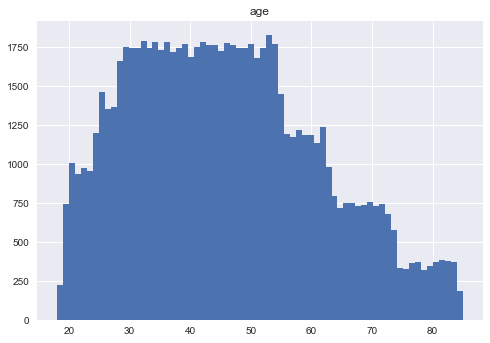

In [9]:
#EDA
histplot = data.hist(column='age', bins=68)

Overall, The majority of Blackwell's customers are between the ages of 28 and 54. The number drops off dramatically on the younger side, and incrimentally on the older side

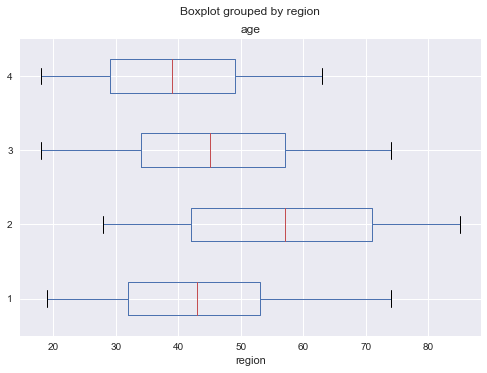

In [66]:
boxplot = data.boxplot(column='age', by='region', vert=False)
plt.savefig('C1T2_age_rgn.png', dpi=300, bbox_inches='tight')

Initial observations: Customers in the South tend to be older than their counterparts. Younger people there don't seem to shop at Blackwell Electronics, while older people do. The West region tends to be the youngest, with not as many older customers. 

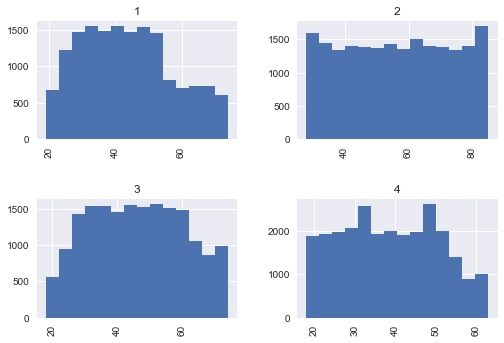

In [11]:
histplot = data.hist(column='age', bins=14, by='region')

The South region seems to have the most even distribution based on age. The West has some spikes in the early thirties and late fourties before dropping off after the mid 50's. the North and East have increasing numbers up to age 30 before evening out. In the East region, the number drops off after 60, while the North drops off early in the mid fifties.

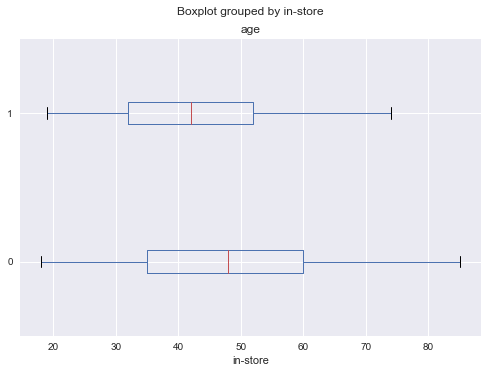

In [69]:
boxplot = data.boxplot(column='age', by='in-store', vert=False)
plt.savefig('C1T2_age_ins', dpi=300, bbox_inches='tight')

Older people don't use the online store as much. No one over 75 used it. This may be part of the reason there are lower numbers of older people buying electronics.

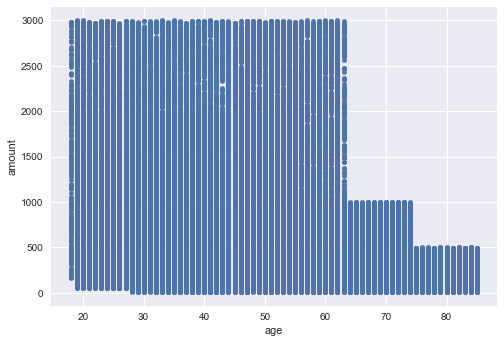

In [13]:
scatterplot = data.plot.scatter(x='age', y='amount')

Younger people tend to spend a lot more on electronics than older people. The amount spent drops off sharply around age 65.

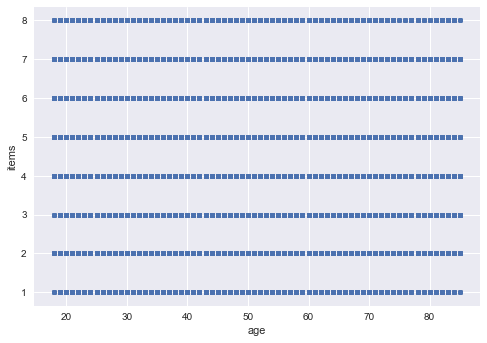

In [14]:
scatter = data.plot.scatter(x='age', y='items')

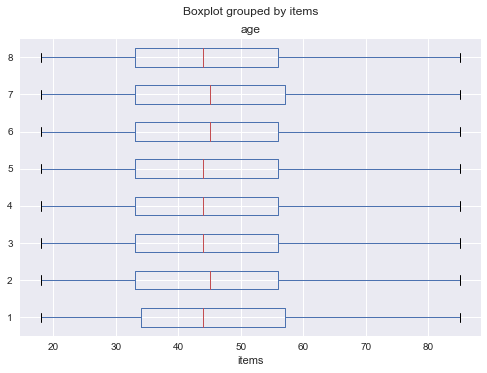

In [15]:
boxplot = data.boxplot(column='age', by='items', vert=False)

Does not seem to be correlation between age and items bought, so not really relevant

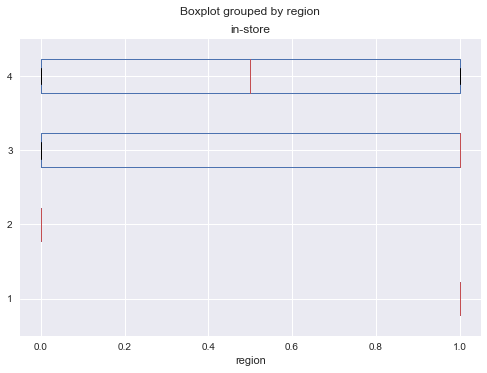

In [72]:
boxplot = data.boxplot(column='in-store', by='region', vert=False)

In [16]:
#features
X = data.iloc[:,data.columns.isin(['items','in-store','amount','age'])]
print('summary of feature sample')
X.head()

summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [17]:
y = data['region']

In [18]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [19]:
#Modeling Classification
algo = DecisionTreeClassifier()
model = algo.fit(X_train,y_train)

In [20]:
#predictions
preds = model.predict(X_test)

In [21]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.40      0.39      0.40      4838
           2       0.91      0.90      0.91      5979
           3       0.37      0.38      0.38      5391
           4       0.53      0.53      0.53      7786

    accuracy                           0.56     23994
   macro avg       0.55      0.55      0.55     23994
weighted avg       0.56      0.56      0.56     23994



Just over 50% accuracy. Discretize Amount?

In [22]:
from sklearn.tree import plot_tree

In [23]:
#Discretize ages
decade = pd.IntervalIndex.from_tuples([(10,20),(20,30),(30,40),(40,50),(50,60),(60,70),(70,80),(80,90)])
data['decade']=pd.cut(data['age'],decade)
data['decade']=data['decade'].astype('string')
data['decade']=data['decade'].replace('(10, 20]','10')
data['decade']=data['decade'].replace('(20, 30]','20')
data['decade']=data['decade'].replace('(30, 40]','30')
data['decade']=data['decade'].replace('(40, 50]','40')
data['decade']=data['decade'].replace('(50, 60]','50')
data['decade']=data['decade'].replace('(60, 70]','60')
data['decade']=data['decade'].replace('(70, 80]','70')
data['decade']=data['decade'].replace('(80, 90]','80')
data['decade']=data['decade'].astype('float')
data['decade'].head(20)

0     30.0
1     30.0
2     40.0
3     40.0
4     30.0
5     20.0
6     40.0
7     60.0
8     50.0
9     40.0
10    40.0
11    30.0
12    30.0
13    40.0
14    30.0
15    40.0
16    10.0
17    40.0
18    30.0
19    50.0
Name: decade, dtype: float64

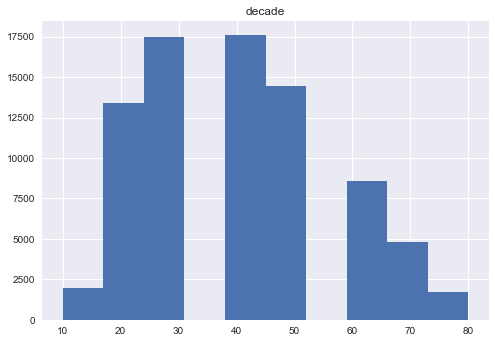

In [68]:
histplot = data.hist(column='decade')

In [24]:
X = data.iloc[:,data.columns.isin(['in-store','amount','decade'])]
y = data['region']
X.head(20)

,in-store,amount,decade
0,0,281.0300,30.0
1,0,219.5100,30.0
2,1,1525.7000,40.0
3,1,715.2500,40.0
4,1,1937.5000,30.0
5,0,1314.2000,20.0
6,0,8.5472,40.0
7,1,819.9800,60.0
8,1,908.3100,50.0
9,1,767.5400,40.0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)
algo = DecisionTreeClassifier()
model = algo.fit(X_train,y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.40      0.39      0.40      4838
           2       0.91      0.90      0.90      5979
           3       0.37      0.38      0.37      5391
           4       0.52      0.52      0.52      7786

    accuracy                           0.56     23994
   macro avg       0.55      0.55      0.55     23994
weighted avg       0.56      0.56      0.56     23994



Still about same accuracy (slightly less, even), how to improve further? Taking out 'items' column has no effect. Different classification algorithms?

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)
algo = GradientBoostingClassifier()
model = algo.fit(X_train,y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.40      0.49      0.44      4838
           2       0.89      1.00      0.94      5979
           3       0.47      0.27      0.34      5391
           4       0.65      0.69      0.67      7786

    accuracy                           0.63     23994
   macro avg       0.60      0.61      0.60     23994
weighted avg       0.62      0.63      0.62     23994



A bit more accurate overall with Gradient Boosting Classifier. Discretize amount?

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30,)
algo = DecisionTreeClassifier()
model = algo.fit(X_train,y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.40      0.41      0.40      4778
           2       0.90      0.90      0.90      5946
           3       0.38      0.38      0.38      5504
           4       0.52      0.52      0.52      7766

    accuracy                           0.56     23994
   macro avg       0.55      0.55      0.55     23994
weighted avg       0.56      0.56      0.56     23994



In [28]:
X = data.iloc[:,~data.columns.isin(['age','decade'])]
y = data['decade']
print(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)
algo = DecisionTreeClassifier()
model = algo.fit(X_train,y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

   in-store  items   amount  region
0         0      4   281.03       2
1         0      2   219.51       2
2         1      3  1525.70       4
3         1      3   715.25       3
4         1      4  1937.50       1
              precision    recall  f1-score   support

        10.0       0.05      0.04      0.05       628
        20.0       0.20      0.21      0.20      3961
        30.0       0.23      0.23      0.23      5235
        40.0       0.23      0.22      0.23      5326
        50.0       0.19      0.19      0.19      4283
        60.0       0.16      0.15      0.16      2598
        70.0       0.13      0.12      0.12      1439
        80.0       0.09      0.09      0.09       524

    accuracy                           0.19     23994
   macro avg       0.16      0.16      0.16     23994
weighted avg       0.19      0.19      0.19     23994



Precision matches the percentage of data in each bin. How to get it higher?

In [29]:
#discretize amounts
amount_bins = pd.IntervalIndex.from_tuples([(0,500),(500,1000),(1000,1500),(1500,2000),(2000,2500),(2500,3000)])
data['amount_bins']=pd.cut(data['amount'],amount_bins)
data['amount_bins']=data['amount_bins'].astype('string')
data['amount_bins']=data['amount_bins'].replace('(0, 500]','500')
data['amount_bins']=data['amount_bins'].replace('(500, 1000]','1000')
data['amount_bins']=data['amount_bins'].replace('(1000, 1500]','1500')
data['amount_bins']=data['amount_bins'].replace('(1500, 2000]','2000')
data['amount_bins']=data['amount_bins'].replace('(2000, 2500]','2500')
data['amount_bins']=data['amount_bins'].replace('(2500, 3000]','3000')
data['amount_bins']=data['amount_bins'].astype('float')
data['amount_bins'].head()

0     500.0
1     500.0
2    2000.0
3    1000.0
4    2000.0
Name: amount_bins, dtype: float64

In [30]:
X = data.iloc[:,~data.columns.isin(['amount','amount_bins'])]
y = data['amount_bins']
print(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)
algo = DecisionTreeClassifier()
model = algo.fit(X_train,y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

   in-store  age  items  region  decade
0         0   37      4       2    30.0
1         0   35      2       2    30.0
2         1   45      3       4    40.0
3         1   46      3       3    40.0
4         1   33      4       1    30.0
              precision    recall  f1-score   support

       500.0       0.69      0.71      0.70     11014
      1000.0       0.38      0.45      0.41      5819
      1500.0       0.22      0.21      0.21      2560
      2000.0       0.22      0.16      0.19      2592
      2500.0       0.14      0.09      0.11      1002
      3000.0       0.15      0.11      0.13      1007

    accuracy                           0.48     23994
   macro avg       0.30      0.29      0.29     23994
weighted avg       0.47      0.48      0.47     23994



In [31]:
X = data.iloc[:,~data.columns.isin(['region','amount','age','items'])]
y = data['region']
print(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 500)
algo = DecisionTreeClassifier()
model = algo.fit(X_train,y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

   in-store  decade  amount_bins
0         0    30.0        500.0
1         0    30.0        500.0
2         1    40.0       2000.0
3         1    40.0       1000.0
4         1    30.0       2000.0
              precision    recall  f1-score   support

           1       0.41      0.54      0.46      4791
           2       0.88      1.00      0.94      6036
           3       0.49      0.22      0.31      5334
           4       0.66      0.70      0.68      7833

    accuracy                           0.64     23994
   macro avg       0.61      0.62      0.60     23994
weighted avg       0.63      0.64      0.62     23994



In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 500)
algo = RandomForestClassifier(max_depth=4,)
model = algo.fit(X_train,y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.41      0.61      0.49      4791
           2       0.88      1.00      0.94      6036
           3       0.52      0.16      0.24      5334
           4       0.66      0.70      0.68      7833

    accuracy                           0.64     23994
   macro avg       0.62      0.62      0.59     23994
weighted avg       0.63      0.64      0.61     23994



Discretizing the amount and age columns got the decision tree classifier to match the gradient boosting classifier. Taking out the 'items' column slightly improved results for region 3

In [33]:
data.groupby('region')['in-store'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,15997.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
2,19994.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,18000.0,0.611056,0.487524,0.0,0.0,1.0,1.0,1.0
4,25988.0,0.500000,0.500010,0.0,0.0,0.5,1.0,1.0


In [34]:
data.groupby('region')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,15997.0,43.704132,14.085525,19.0,32.0,43.0,53.0,74.0
2,19994.0,56.609083,16.537368,28.0,42.0,57.0,71.0,85.0
3,18000.0,45.646944,14.417935,18.0,34.0,45.0,57.0,74.0
4,25988.0,38.752424,11.886239,18.0,29.0,39.0,49.0,63.0


In [35]:
data.groupby('region')['decade'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,15997.0,38.257173,14.485875,10.0,30.0,40.0,50.0,70.0
2,19994.0,51.225368,16.978216,20.0,40.0,50.0,70.0,80.0
3,18000.0,40.143889,14.839788,10.0,30.0,40.0,50.0,70.0
4,25988.0,33.297291,12.355845,10.0,20.0,30.0,40.0,60.0


In [36]:
data.groupby('region')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,15997.0,744.990939,492.989025,50.0500,358.9900,662.860,973.490,1999.80
2,19994.0,252.097741,142.676946,5.0047,129.6300,250.205,374.920,499.94
3,18000.0,917.969637,751.409992,50.1320,372.9975,697.825,1134.550,3000.00
4,25988.0,1283.938357,756.302513,50.6000,659.4575,1230.250,1812.775,3000.00


In [37]:
data.groupby('region')['amount_bins'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,15997.0,987.247609,482.333462,500.0,500.0,1000.0,1000.0,2000.0
2,19994.0,500.000000,0.000000,500.0,500.0,500.0,500.0,500.0
3,18000.0,1157.944444,746.660024,500.0,500.0,1000.0,1500.0,3000.0
4,25988.0,1527.435740,750.762835,500.0,1000.0,1500.0,2000.0,3000.0


Regions 1 and 3 are similar, 2 and 4 more distinct. How to make columns where they are more distinct more important?

In [64]:
X = data.iloc[:,~data.columns.isin(['region','items','age','amount'])]
y = data['region']
X.head()

,in-store,decade,amount_bins
0,0,30.0,500.0
1,0,30.0,500.0
2,1,40.0,2000.0
3,1,40.0,1000.0
4,1,30.0,2000.0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 500)
algo = DecisionTreeClassifier(max_depth=4, class_weight='balanced')
model = algo.fit(X_train,y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.41      0.61      0.49      4791
           2       0.88      1.00      0.94      6036
           3       0.52      0.16      0.24      5334
           4       0.66      0.70      0.68      7833

    accuracy                           0.64     23994
   macro avg       0.62      0.62      0.59     23994
weighted avg       0.63      0.64      0.61     23994



In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 500)
algo = DecisionTreeClassifier(max_depth=4, class_weight='balanced')
model = algo.fit(X_train,y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.41      0.61      0.49      4791
           2       0.88      1.00      0.94      6036
           3       0.52      0.16      0.24      5334
           4       0.66      0.70      0.68      7833

    accuracy                           0.64     23994
   macro avg       0.62      0.62      0.59     23994
weighted avg       0.63      0.64      0.61     23994



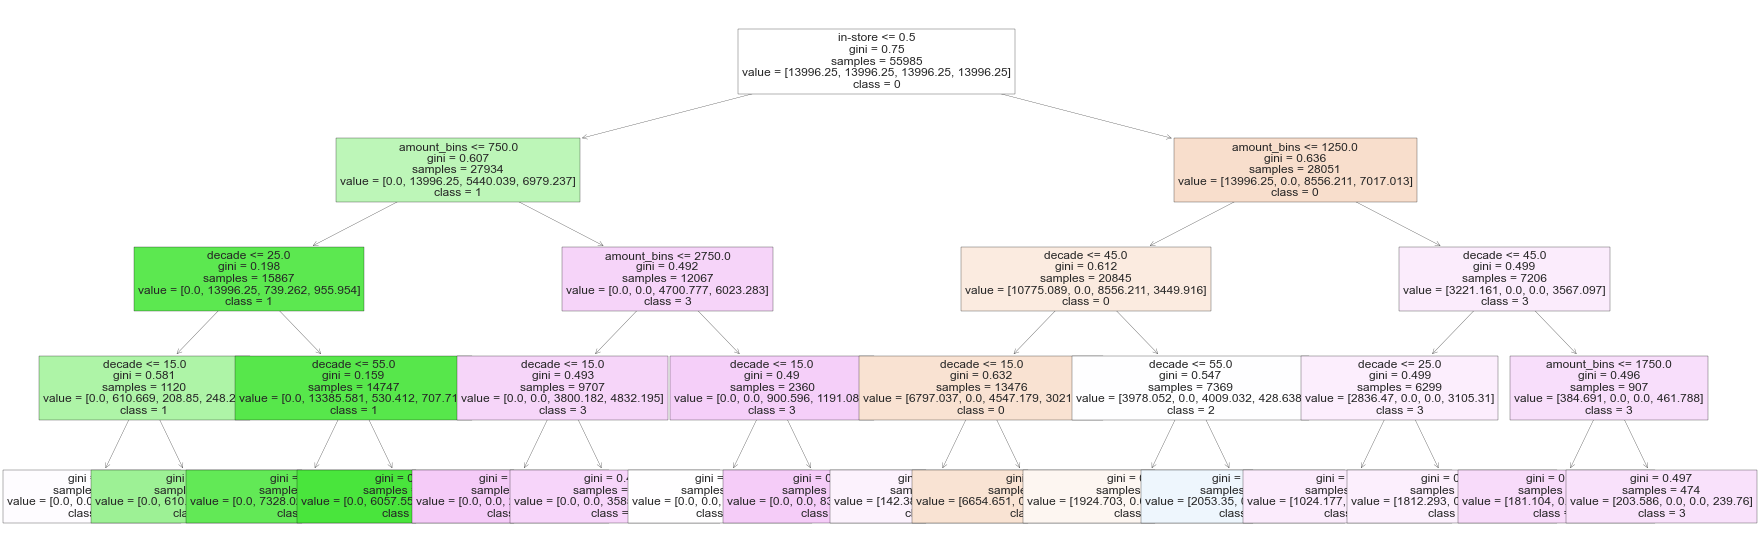

In [41]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(30,10))
tree = plot_tree(model, feature_names=X.columns,class_names=['0', '1', '2', '3'], filled=True, fontsize=12)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 500)
algo = DecisionTreeClassifier(max_depth=4, class_weight='balanced')
model = algo.fit(X_train,y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.41      0.61      0.49      4791
           2       0.88      1.00      0.94      6036
           3       0.52      0.16      0.24      5334
           4       0.66      0.70      0.68      7833

    accuracy                           0.64     23994
   macro avg       0.62      0.62      0.59     23994
weighted avg       0.63      0.64      0.61     23994



In [43]:
#adding in cross validation score
model = DecisionTreeClassifier()
print(cross_val_score(model, X, y, cv=5)) 

[0.63734684 0.63509627 0.63303326 0.63903476 0.64045014]


In [44]:
algos_class = []
algos_class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

In [45]:
results = []
names = []
for name, model in algos_class:
    result = cross_val_score(model, X, y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [46]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.636242025452535
Decision Tree Classifier 0.636242025452535
Gradient Boosting Classifier 0.6353292649093478


In [47]:
X = data.iloc[:,~data.columns.isin(['age','amount','in-store'])]
y = data['in-store']
X.head()

,items,region,decade,amount_bins
0,4,2,30.0,500.0
1,2,2,30.0,500.0
2,3,4,40.0,2000.0
3,3,3,40.0,1000.0
4,4,1,30.0,2000.0


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 500)
algo = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
model = algo.fit(X_train,y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80     12055
           1       0.75      1.00      0.86     11939

    accuracy                           0.83     23994
   macro avg       0.87      0.83      0.83     23994
weighted avg       0.88      0.83      0.83     23994



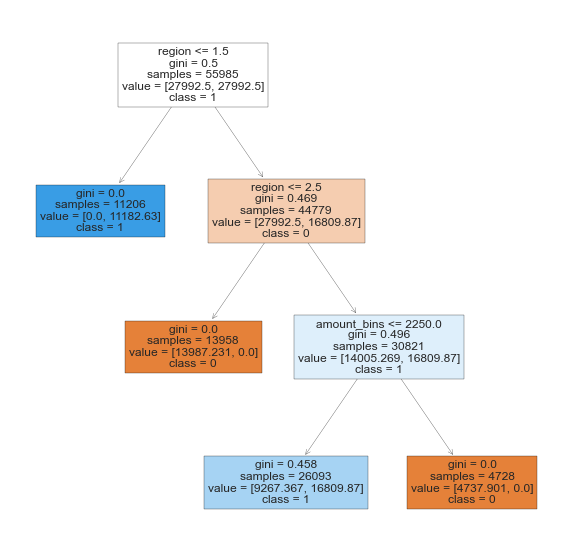

In [55]:
fig = plt.figure(figsize=(10,10))
tree = plot_tree(model, feature_names=X.columns,class_names=['0', '1', '2', '3'], filled=True, fontsize=12)

In [56]:
#adding in cross validation score
model = DecisionTreeClassifier()
print(cross_val_score(model, X, y, cv=5)) 

[0.87728182 0.87371843 0.87584396 0.87490623 0.87714911]


In [57]:
algos_class = []
algos_class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

In [58]:
results = []
names = []
for name, model in algos_class:
    result = cross_val_score(model, X, y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [59]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.8756298470131244
Decision Tree Classifier 0.8757423845251985
Gradient Boosting Classifier 0.8752797566772315
